This is **not** the following of `l_qut_2` but solely another direction.
Indeed, we've seen on `l_qut_2` the theory over the penalty $Rational_\nu, P_\nu$ and we got the same result than the original paper. Nonetheless for $s=0, \nu=0.9 and \alpha=0.05$ we don't find an error of type I $\neq 0.05$ but often equal to 1 ! So there is a problem but we don't know where for the moment.  

Then, we look other penalties and more precisely $ln-\Sigma$, to see if the problem occurs still and how, when... We have ideas but we need to explore to understand more what it happens.

$\textbf{GOAL :}$ We want implent a new penalty, see the performance compared to $P_\nu$, see if theoritically its simpler (because the proximal from `l_qut_2` is implicit and not explicit) and more *(I don't spoil)*

We still keep the loss function as RMSE and we define the cost function, for $\lambda >0$ and P a penalty ($\ell_1,P_\nu, P^\Sigma, \dots$ ) as,
$$\mathcal{C} := RMSE + \lambda P$$

*Maybe it's $\sqrt{n}RMSE$ but the idea is the same at a scalar factor.*

# Theory

The penalty wasn't find by Candes but I find first this penalty in this paper (and others penalties) very interesting to read.
> Enhancing Sparsity by Reweighted ℓ1 Minimization  
Emmanuel J. Candès† Michael B. Wakin♯ Stephen P. Boyd§

## ln-$\Sigma$

Let $\epsilon >0$, we denote and name ln-$\Sigma$ (or log sum)

$$P^{\Sigma} : \theta\in \mathbb{R}^p \mapsto \sum_{i=1}^p \rho^\Sigma(\theta_i) \quad \text{with} \quad \rho^\Sigma : x \in  \mathbb{R} \mapsto \ln{(1+\frac{|x|}{\epsilon})} $$

ln-$\Sigma$ is continuous, even, differentiable except in 0, not convex, locally lipschitz.

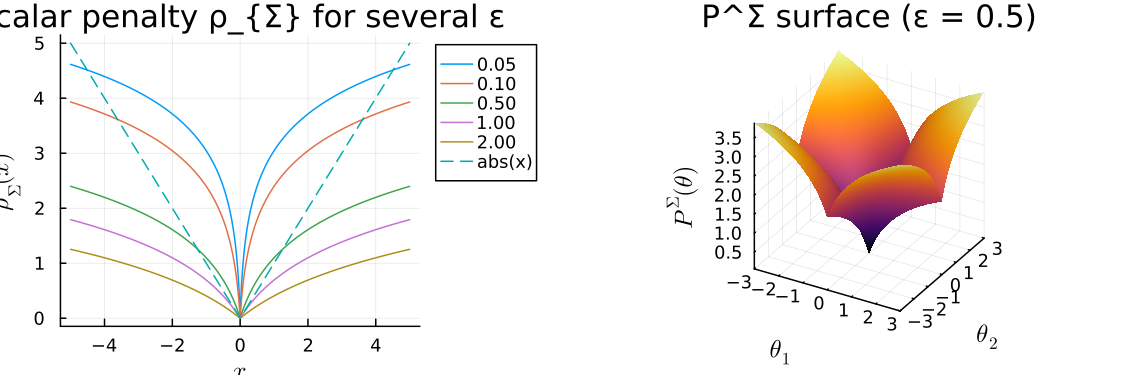

In [1]:
using Plots, LaTeXStrings, Printf

rhoSigma(ε, x) = log(1 + abs(x) / ε)                # ρ_Σ(x)
PSigma(ε, θ1, θ2) = rhoSigma(ε, θ1) + rhoSigma(ε, θ2) 

xs   = range(-5, 5; length = 1000)
epss = [0.05, 0.1, 0.5, 1., 2.]

plt2d = plot(; xlabel = L"x",ylabel = L"\rho_\Sigma(x)",title  = "Scalar penalty ρ_{Σ} for several ε",legend = :outertopright,neatlegendtitle = L"\epsilon",legendfontsize = 8,dpi = 150)

for ε in epss
    plot!(plt2d, xs, x -> rhoSigma(ε, x), label = @sprintf("%.2f", ε))
end
plot!(plt2d, xs, x -> abs(x), label = "abs(x)", linestyle = :dash)

grid = range(-3, 3; length = 200)
ε = 0.5
Z = [PSigma(ε, θ1, θ2) for θ2 in grid, θ1 in grid]

plt3d = surface(grid, grid, Z;xlabel = L"\theta_1",ylabel = L"\theta_2",zlabel = L"P^\Sigma(\theta)",title  = "P^Σ surface (ε = $(ε))",camera = (30, 30),legend = false)

plot(plt2d, plt3d; layout = (1, 2), size = (750, 250))

## Sparse properties

$\textbf{Proposition :}$ $P_\Sigma$ is sparse inducing, a local minimum exist for $\lambda>0$ for $\theta_1=0$. That's to say,

$$\exists \lambda>0 \quad \text{such as} \quad \partial_{|\theta_1=0}\mathcal{C} = 0$$


*Proof* 
$\mathcal{C}$ is not differentiable in 0 but is locally lispchitz by sum of locally lispchitz so we can use sub-differential of Clarke in 0. 
We have,
$$\partial_{|\theta_1=0}\mathcal{C}
= \partial_{|\theta_1=0}{RMSE} + \lambda \partial_{|\theta_1=0}{P^\Sigma}
=\Bigl\{\frac{-X^T(y-\theta_2\textbf{1})}{||y-\theta_2\textbf{1}||_2}\Bigr\} + \lambda \Bigl[-\frac{1}{\epsilon}, \frac{1}{\epsilon}\Bigr]^p
$$

Because, 
$$
\rho^{\Sigma}{'}(x) = \frac{\operatorname{sign}(x)}{\epsilon + |x|} \quad \text{so} \quad \lim_{x \to 0^\pm} \rho^{\Sigma}{'}(x) = \pm \frac{1}{\epsilon}
$$

So,
$$
0_{\mathbb{R^p}} \in \partial_{|\theta_1=0}\mathcal{C} \Longleftrightarrow 
\forall i \in \llbracket 1, p \rrbracket,\;
0 \in \left\{ \frac{-X_i^T(y - \theta_2 \mathbf{1})}{\|y - \theta_2 \mathbf{1}\|_2} \right\}
+ \lambda \left[ -\frac{1}{\epsilon}, \frac{1}{\epsilon} \right]
\Longleftrightarrow  \epsilon \frac{||X^T(y-\theta_2\textbf{1})||_\infty}{||y-\theta_2\textbf{1}||_2} \in [\pm \lambda]$$

So for all $\lambda>\epsilon \frac{||X^T(y-\theta_2\textbf{1})||_\infty}{||y-\theta_2\textbf{1}||_2}$ we have well a local minima in $\theta = (\theta_1, \theta_2) = (0_\mathbb{R^p}, \theta_2)$

$\textbf{Proposition :} P^\Sigma$ is QUT-Compatible and $\Lambda = \epsilon \frac{||X^T(Y-\theta_2\textbf{1})||_\infty}{||Y-\theta_2\textbf{1}||_2}$ 

*Proof* From the precedent proof we showed $\lambda_0^{local} = \lambda_0$ and so we already got the formula of the statistic.

It's intersting to contast the proof need only to know the behaviour on one point (0) and we get the same statistic than `l_qut_1` and `l_qut_2` with only a factor $\epsilon$.

## Proximal

For $\gamma>0, \lambda>0$ we denote

$$
\operatorname{prox}_{\gamma,\lambda P^{\Sigma}},

z\in\mathbb R^p\;\longmapsto\;
\arg\min_{x\in\mathbb R^p}
\Bigl\{
\lambda P^{\Sigma}(x)+\tfrac1{2\gamma}\|x-z\|_2^2
\Bigr\}
$$

Thanks to separability, for every $z\in\mathbb R^p$ and $i\in\llbracket1,p\rrbracket$

$$
[\operatorname{prox}_{\gamma,\lambda P^{\Sigma}}(z)]_i
=
\arg\min_{x\in\mathbb R}\;
\underbrace{\Bigl\{
\lambda\rho^{\Sigma}(x)+\tfrac1{2\gamma}(x-z_i)^2
\Bigr\}}_{m(x;z_i)}
$$


m is continuous (sum of continuous functions) and coercive, hence it has at least one global minimiser.
Moreover $m$ is differnetiable on $\mathbb{R}^*$

We have for $x\neq 0$,

$$
m'(x;z)=\frac{x-z}{\gamma} +
\frac{\lambda}{\epsilon+|x|}\operatorname{sgn}(x) = \begin{cases}
\dfrac{x-z}{\gamma}\;+\;\dfrac{\lambda}{\epsilon+x} & x>0\\[8pt]
\dfrac{x-z}{\gamma}\;-\;\dfrac{\lambda}{\epsilon-x} & x<0
\end{cases}
$$

So $m'(x;z)$ require $sign(x)=sign(z)$ otherwise it's still negative or positive.

If $z>0$ (so $x>0$),

$$m'(x;z)=0 \Longleftrightarrow 
\frac{x-z}{\gamma}+\frac{\lambda}{\epsilon+x}=0
\Longleftrightarrow 
x^{2}+(\epsilon-z)\,x-\epsilon z+\gamma\lambda=0
$$


Solution exists if and only if, 
$$(\epsilon-z)^2-4(\lambda \gamma - z\epsilon) \geq 0 \Longleftrightarrow (z+\epsilon)^{2}-4\gamma\lambda \geq 0 \Longleftrightarrow z \geq 2\sqrt{\lambda \gamma} - \epsilon$$

So $m'$ become null for $z \geq 2\sqrt{\lambda \gamma} -\epsilon$ on a unique point (the other if discriminant is strcitly positive become negative and we suppose $x>0$),

$$x_z^* = \frac{z-\epsilon + \sqrt{(z+\epsilon)^{2}-4\gamma\lambda} }{2}$$


If $z<0$ (so $x<0$), the minimizer is $-x_{-z}^*$ <span style="color:red"><b>TODO :</b></span> confirmer (calcul + voir le pdf)

We also write for all $z$ (the discriminant has to be positive !), 

$$
x_z^* = \operatorname{sign}(z)\frac{|z|-\epsilon + \sqrt{(|z|+\epsilon)^2-4\gamma}}{2}
$$

Then, $$0 \in \partial m(0;z) \Longleftrightarrow -\frac{z}{\gamma} \in [\pm \frac{\lambda}{\epsilon}] \Longleftrightarrow |z|\leq \frac{\lambda \gamma}{\epsilon}$$

And we see that $\frac{\lambda \gamma}{\epsilon} - (2\sqrt{\gamma\lambda} - \epsilon) \geq 0$. Indeed,
$$\gamma\lambda+\epsilon^2\geq 2\sqrt{\lambda \gamma}\epsilon \Longleftrightarrow (\sqrt{\lambda\gamma}-\epsilon)\geq 0$$

So we have, (and by symetry we get the same negative  interval)
+ On $[0;2\sqrt{\gamma\lambda} - \epsilon[$ 0 is minimizer.
+ On $[2\sqrt{\gamma\lambda} - \epsilon; \frac{\lambda \gamma}{\epsilon}]$ : 0 or $x^*$ is minimizer
+ On $]\frac{\lambda \gamma}{\epsilon};+\infty[$ : $x_z^*$ is minimizer.

Let the differentiable function $$H : z \in \Bigl[2\sqrt{\gamma\lambda} - \epsilon; \frac{\lambda \gamma}{\epsilon}\Bigr] \mapsto m(x_z^*;z)-m(0;z)$$



We want to know the sign of $H$, so how it behaves. Then, we look its differentiable,

$$\partial_z H(z) = \partial_z m(x_z^*;z) -  \partial_z m(0;z)
= \bigl[m'(x_z^*;z)\partial_z x_z^* + \partial_z m(x_z^*;z)\bigr] - \partial_z m(0;z) = 0 + \frac{z-x_z^*}{\gamma}- \Bigl(-\frac{0-z}{\gamma}\Bigr) = -\frac{x_z^*}{\gamma} < 0$$

So H is stricly decreasing.

We have for $z=2\sqrt{\lambda \gamma} - \epsilon$, $x_z^* = \sqrt{\lambda\gamma} -\epsilon$

$$H(z) = \lambda \ln(\frac{\sqrt{\lambda\gamma}}{\epsilon}) + \frac{\Bigl(\sqrt{\lambda\gamma} -\epsilon - 2\sqrt{\lambda \gamma} + \epsilon \Bigr)^2}{2\gamma} - \frac{(2\sqrt{\lambda \gamma} - \epsilon)^2}{2\gamma} 
=\lambda \ln(\frac{\sqrt{\lambda\gamma}}{\epsilon}) + \frac{\lambda}{2} - \frac{(2\sqrt{\lambda \gamma} - \epsilon)^2}{2\gamma} = \ln\!\Bigl(\tfrac{\sqrt{\gamma\lambda}}{\epsilon}\Bigr)
  -\frac{3\lambda}{2}
  +\frac{2\epsilon\sqrt{\gamma\lambda}}{\gamma}
  -\frac{\epsilon^{2}}{2\gamma}
$$

We recall $z,x>0$ so $\sqrt{\lambda \gamma}>\epsilon$, then,
$$
H(z) = \lambda h(\frac{\epsilon}{\sqrt{\lambda \gamma}}) \quad \text{with} \quad h : w \mapsto \ln(\frac{1}{w}) - \frac{3}{2} +2w - \frac{w^2}{2}$$

We have $h'(w) =-\frac{1}{r}+2-r<0$ on $]0,1[$ hence h strictly decreasing. Moreover, $h(1)=0$ so h is positive on $]0,1[$, then $$H(z=2\sqrt{\lambda \gamma} - \epsilon)>0$$


For $z=\frac{\lambda\gamma}{\epsilon}$, then $x_z^*=\frac{\lambda\gamma}{\epsilon} - \epsilon$  <span style="color:red"><b>TODO :</b></span> à confirmer 

$$H(z) = \lambda \ln\Bigl(\frac{\lambda \gamma}{\epsilon^2}\Bigr) + \frac{\epsilon^2}{2\gamma} - \frac{\lambda^2\gamma}{2\epsilon^2} = \lambda g(\frac{\sqrt{\lambda \gamma}}{\epsilon})
$$

with $g:w \mapsto -2\ln(w)+\frac{w^2}{2}-\frac{1}{2w^2}$ and $g'(w) = \frac{-2}{w} + w + \frac{1}{w^3} = \frac{(w^2-1)^2}{w^3}>0$. We remark $g(1)=0$ and $0<\frac{\sqrt{\lambda \gamma}}{\epsilon}<1$ so 
$$H(z=\frac{\lambda\gamma}{\epsilon})<0$$

Perfect ! By Intermediate Value Theorem we know there exists $\phi \in ]2\sqrt{\gamma\lambda} - \epsilon; \frac{\lambda \gamma}{\epsilon}[$ such as $H(\phi)=0$

$$H(\phi)=0 \Longleftrightarrow m(x_\phi^*;\phi) = m(0;\phi)
\Longleftrightarrow
\lambda \ln\Bigl(1+\frac{x_\phi^*}{\epsilon}\Bigr) =  \frac{x_\phi^*(2\phi-x_\phi^*)}{2\gamma}$$

Of course, it doesn't exist a explicit formula (whereas the article write *explicit* but apparently we don't have the same definition of this word...)

> The Proximity Operator of The Log-sum Penalty  
Ashley Prater-Bennette∗ Lixin Shen† Erin E. Tripp‡

So we will use Bisection/Newton to solve it.

So the proximal is given by,
$$
\eta_{\gamma,\lambda}^{\Sigma}(z)=
\begin{cases}
0, & |z|\le\phi\\[6pt]
\displaystyle
\operatorname{sign}(z)\
\frac{|z|-\epsilon+\sqrt{(|z|+\epsilon)^{2}-4\gamma\lambda}}{2}
& |z|>\phi
\end{cases}
$$

where the threshold $\phi$ is the unique solution of  
$$\lambda \ln\Bigl(1+\frac{x_\phi^*}{\epsilon}\Bigr) =  \frac{x_\phi^*(2\phi-x_\phi^*)}{2\gamma} \quad \text{and} \quad 
x_z^*=\dfrac{|z|-\epsilon+\sqrt{(|z|+\epsilon)^{2}-4\gamma\lambda}}{2}$$

Remark : At $\phi$ we have two global minima so we take the simpler : 0

In [2]:
function bisection(f, a, b; tol=1e-10, maxiter=1000, verbose=false)
    if f(a)==0
        return a, 0
    end
    if f(b)==0
        return b, 0
    end
    
    if verbose
        @printf("start with a = %.12f : f(a) = %.12f, b = %.12f : f(b) = %.12f\n", a, f(a), b, f(b))
    end
    fa, fb = f(a), f(b)
    while f(a)*f(b)>0
        b*=2
        if b> 1e10
            return a, -1
        end
        
    end
    # @assert fa * fb < 0 "Need f(a)f(b)<0 : $(fa) | $(fb)"
    for k in 1:maxiter
        m  = 0.5*(a+b)
        fm = f(m)
        if abs(fm) <= tol || 0.5*(b-a) <= tol
            if verbose
                @printf("bisection: found %.12f in %d iterations | a = %.12f, b = %.12f, f(a) = %.12f, f(b) = %.12f\n", m, k, a, b, fa, fb)
            end
            return m, k
        elseif fm>0
            b, fb = m, fm
        else
            a, fa = m, fm
        end
    end
    error("No convergence in $maxiter iterations")
end

bisection (generic function with 1 method)

The idea to name it "explicit" is because you need to call once the root finding for a configuration of $(\lambda, \gamma, \epsilon)$

In [3]:
function break_point(γ, λ, ε; tol=1e-10, maxiter=1000)
    bound_low = 2*sqrt(λ*γ) - ε
    bound_high = λ*γ/ε

    x_star_pos(y) = (y - ε + sqrt(max((y + ε)^2 - 4γ*λ,0)))/2 # TODO : verifier que le max est seulement pour éviter les NaN (et ne cause pas d'autres problemes !)

    H(y) = λ*log1p(x_star_pos(y)/ε) - x_star_pos(y)*(2y - x_star_pos(y))/(2γ)

    phi, _ = bisection(H, bound_low, bound_high; tol=tol, maxiter=maxiter, verbose=false)
    return phi
end

break_point (generic function with 1 method)

In [4]:
function prox_logsum_scalar(z, γ, λ, ε, φ)
    y = abs(z)

    x_star_pos(y) =(y - ε + sqrt(max((y + ε)^2 - 4γ*λ,0))) / 2

    y ≤ φ && return 0.0
    return sign(z) * x_star_pos(y)
end

function prox_logsum(z::AbstractVector, γ, λ, ε)
    φ = break_point(γ, λ, ε) # TODO le sortir d'ici et le passer en argument pour accelerer
    θ_1_new = map(zi -> prox_logsum_scalar(zi, γ, λ, ε, φ), z[1:end-1])
    return vcat(θ_1_new, z[end])
end

prox_logsum (generic function with 1 method)

## Visualisations

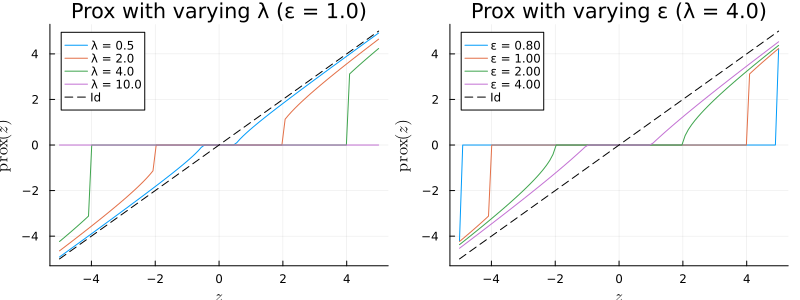

In [5]:
γ = 1.0 # fixed step size, for visualisation we can consider equal to one
z_grid = range(-5, 5; length = 100)

λs = [0.5, 2.0, 4.0, 10.0]
εs = [ 0.8, 1., 2.0, 4.0]

ε_fix = 1.
λ_fix = 4.0

pltλ = plot(title = "Prox with varying λ (ε = $(ε_fix))",xlabel = L"z", ylabel = L"\operatorname{prox}(z)",legend = :topleft)
for λ in λs
    φ = break_point(γ, λ, ε_fix)
    plot!(pltλ, z_grid, z -> prox_logsum_scalar(z, γ, λ, ε_fix, φ), label = @sprintf("λ = %.1f", λ))
end
plot!(pltλ, z_grid, z_grid; linestyle = :dash, color = :black, label = "Id")

pltε = plot(title = "Prox with varying ε (λ = $(λ_fix))",xlabel = L"z", ylabel = L"\operatorname{prox}(z)",legend = :topleft)
for ε in εs
    φ = break_point(γ, λ_fix, ε)
    plot!(pltε, z_grid, z -> prox_logsum_scalar(z, γ, λ_fix, ε, φ),label = @sprintf("ε = %.2f", ε))
end
plot!(pltε, z_grid, z_grid; linestyle = :dash, color = :black, label = "Id")

plot(pltλ, pltε; layout = (1, 2), size = (800, 300))


# Experiments

In [6]:
using LinearAlgebra, Statistics, Random, Printf

In [7]:
include("../functions/ISTA.jl")
include("../functions/metrics.jl")

import .ISTA: ista_L, ista
import .metrics: pesr, tpr, fdr, f1score

In [8]:
n = 70 # number of observations
p = 200 # number of variables
s = 5 # sparsity level
ε  = 10.
σ = 0.1 # oracle noise std
α = 0.05 # desired test level
B_qut = 1000 # simulations for λ_QUT
;

In [9]:
rho(x, ε) = log(1 + abs(x) / ε)  # ρ(x)
rho_prime(x, ε) = sign(x) / (ε + abs(x))  # ρ'(x)

rho_prime (generic function with 1 method)

In [10]:
function lambda_local0(y, X, ε; verbose=false)
    r = y .- mean(y)
    if verbose
        @printf("residu norm : %.12f\n", norm(r))
    end
    return ε*maximum(abs.(X' * r)) / norm(r)
end

function lambda_qut_ln_sum(X, ε; α=0.05, M=1000, rng=Random.GLOBAL_RNG, verbose=false)
    n = size(X,1)
    λvals = Vector{Float64}(undef, M)
    for m in 1:M
        y0 = randn(rng, n)
        λvals[m] = lambda_local0(y0, X, ε; verbose=verbose)
    end
    return quantile!(λvals, 1-α)
end

lambda_qut_ln_sum (generic function with 1 method)

## Null model verification

In [11]:
R_null = 100 # number of iterations on differents null models
mu = 2.
c = 4.0 # intercept
false_rejections = 0
tol = 1e-9

Random.seed!(42)

n_print = 10 # print every n_print iterations
c_pred = zeros(R_null) # to store the predictions of the null model

for i in 1:R_null
    # standadization
    X = randn(n, p)
    X .-= mean(X; dims=1)
    X ./= std(X;  dims=1)
    X̃ = hcat(X, ones(n)) # we have intercept (θ₂) so it corresponds to 1

    y = σ*mu* randn(n) .+ c

    λ = lambda_qut_ln_sum(X, ε; α=0.05, M=B_qut, rng=Random.GLOBAL_RNG, verbose=false)

    f(θ) = norm(y - X̃*θ,2)
    ∇f(θ) =X̃'*(X̃*θ - y) ./ norm(X̃*θ - y,2)
    penalty(θ) = λ * sum(rho.(θ[1:end-1], ε)) # penalty on β only
    L0 = 0.001
    # θ_warm_start1 = ista(zeros(p+1), f, penalty, ∇f, L0, (z, γ) -> prox_harder_vec(z, γ, 0., 1.); max_iter=100, tol=tol*10^9, verbose=false)
    # θ_warm_start2 = ista(θ_warm_start1, f, penalty, ∇f, L0, (z, γ) -> prox_harder_vec(z, γ, λ/2, 1-ν/2); max_iter=100, tol=tol*10^8, verbose=false)
    θ_hat = ista(zeros(p+1), f, penalty, ∇f, L0, (z, γ) -> prox_logsum(z, γ, λ, ε); max_iter=10_000, tol=tol, verbose=false)
    
    c_pred[i] = θ_hat[end] # keep the intercept to see if ISTA works well

    if i % n_print == 0
        @printf("Null model %2d: ‖θ̂₁‖ = %.3e, |θ̂₂| = %.3f\n", i, norm(θ_hat[1:p]), abs(θ_hat[end]))
    end

    if any(abs.(θ_hat[1:p]) .> 0)  # type I check
        false_rejections += 1
    end
end

emp_level = false_rejections / R_null
println("Empirical type-I error ", round(emp_level, digits=3)," (level α = $α)")

Null model 10: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 4.031
Null model 20: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.997
Null model 30: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 4.016
Null model 40: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.995
Null model 50: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 4.009
Null model 60: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 4.015
Null model 70: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.998
Null model 80: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.987
Null model 90: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 4.026
Null model 100: ‖θ̂₁‖ = 0.000e+00, |θ̂₂| = 3.977
Empirical type-I error 0.04 (level α = 0.05)


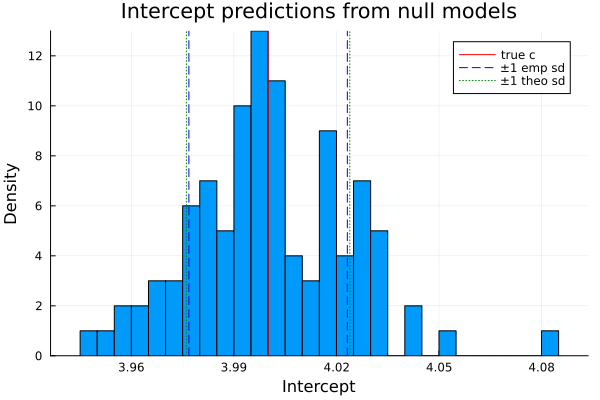

In [12]:
emp_std  = std(c_pred)
theo_std = mu*σ/sqrt(n) 

histogram(c_pred; bins=30,density=true, xlabel="Intercept", ylabel="Density", title="Intercept predictions from null models", label="")

vline!([c]; label="true c",color=:red, )
vline!([c-emp_std,  c+emp_std]; label="±1 emp sd", color=:blue, ls=:dash)
vline!([c-theo_std, c+theo_std]; label="±1 theo sd", color=:green,ls=:dot)

## Phase transition

**NO WARM START** (à réfléchir de si l'on ajoute ou non)

In [13]:
function run_trial_ln_sum(X, β, σ, ε; α=0.05, tol=1e-6, max_iter=10_000, mu=1., c=0.)
    n = size(X, 1)
    X̃ = hcat(X, ones(n)) # Ajout colonne d'intercept
    y = X * β .+ σ * mu *randn(n) .+ c
    
    λ = lambda_qut_ln_sum(X, ε; α = α, M = 1000, verbose = false)


    f(θ) = norm(y - X̃ * θ, 2)
    ∇f(θ) = X̃'*(X̃*θ-y) / norm(X̃ * θ - y, 2)
  
    L0 = 1e-4
    θ  = zeros(p + 1)

    g(θ)  = λ * sum(rho.(θ[1:end-1], ε))  # penalty
    prox( z,γ ) = prox_logsum(z, γ, λ, ε) # proximal operator
    θ_hat = ista(θ, f, g, ∇f, L0, prox;max_iter = 10_000,tol= tol,verbose  = false)
    return θ_hat[1:p]
end
   
function phase_transition_ln_sum(n, p, s_list, ε; σ=0.1, B=20, α=0.05, tol=1e-8, seed=42)
    m = length(s_list)
    pesr_rate = zeros(m)
    f1_rate = zeros(m)
    fdr_rate = zeros(m)
    tpr_rate = zeros(m)

    Random.seed!(42)

    for (i, s) in enumerate(s_list)
        acc_pesr = acc_f1 = acc_fdr = acc_tpr = 0.0

        for _ in 1:B
            X = randn(n, p)
            X .-= mean(X; dims=1)
            X ./= std(X;  dims=1)

            β = zeros(p)
            β[randperm(p)[1:s]] .= 3
            β_hat = run_trial_ln_sum(X, β, σ, ε; α=α, tol=tol, c=4)

            y, ŷ = abs.(β) .> 0, abs.(β_hat) .> 0

            acc_pesr += pesr(β, β_hat; tol=0)
            acc_f1 += f1score(y, ŷ)
            acc_fdr += fdr(y, ŷ)
            acc_tpr += tpr(y, ŷ)
        end

        pesr_rate[i] = acc_pesr/B
        f1_rate[i] = acc_f1 /B
        fdr_rate[i] = acc_fdr/B
        tpr_rate[i] = acc_tpr/B
    end

    return s_list, pesr_rate, f1_rate, fdr_rate, tpr_rate
end

phase_transition_ln_sum (generic function with 1 method)

In [18]:
n, p = 70, 250
s_lst = 0:30
B_trial = 50
sigma = 0.1
ε = 1.

s, pesr_r, f1_r, fdr_r, tpr_r = phase_transition_ln_sum(n, p, s_lst, ε; σ=sigma, B=B_trial, tol=1e-9)

(0:30, [1.0, 0.92, 0.92, 0.82, 0.94, 0.9, 0.84, 0.8, 0.52, 0.24  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.960204081632653, 0.9683921568627452, 0.9245980771805512, 0.9593387905323942, 0.9736575052854122, 0.8593450549450549, 0.8547777777777777, 0.6681619006726031, 0.4508842253410276  …  0.056380237154150185, 0.07118929765886285, 0.034010256410256415, 0.04064273504273505, 0.03794871794871794, 0.03185185185185184, 0.018325123152709354, 0.036465702632554685, 0.0350752688172043, 0.032638074291300084], [0.0, 0.0498974358974359, 0.039801980198019796, 0.08911668325166375, 0.043203960396039603, 0.03285714285714286, 0.05812796596301751, 0.0, 0.06345775073163934, 0.06144663382594417  …  0.06, 0.045, 0.03666666666666667, 0.06, 0.09, 0.06, 0.01, 0.07666666666666666, 0.006666666666666666, 0.02333333333333333], [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.91, 0.8342857142857144, 0.655, 0.4066666666666665  …  0.030476190476190487, 0.03909090909090907, 0.01826086956521739, 0.02166666666666666, 

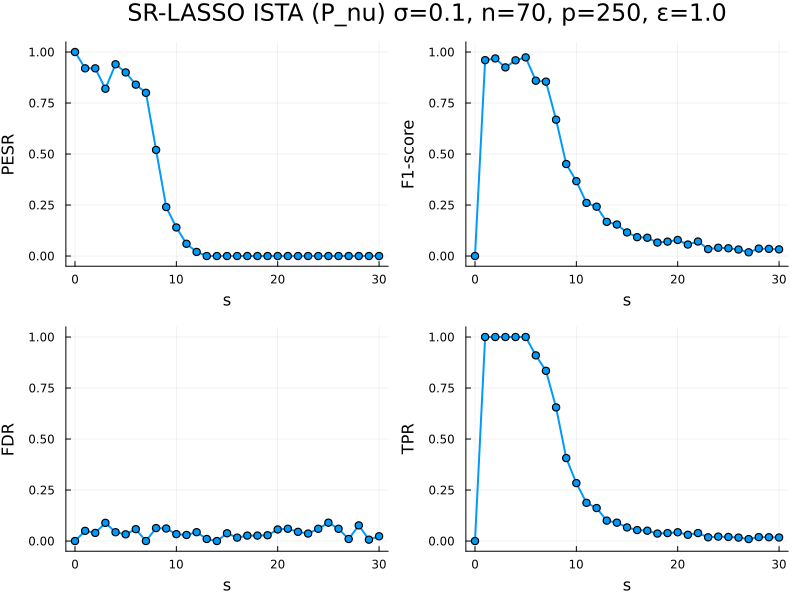

In [19]:
main_title = "SR-LASSO ISTA (P_nu) σ=$sigma, n=$n, p=$p, ε=$ε"
plot(
    plot(s, pesr_r; xlabel="s", ylabel="PESR", legend=false, lw=2, marker=:circle, ylim=(0-0.05,1+0.05)),
    plot(s, f1_r; xlabel="s", ylabel="F1-score", legend=false, lw=2, marker=:circle, ylim=(0-0.05,1+0.05)),
    plot(s, fdr_r; xlabel="s", ylabel="FDR", legend=false, lw=2, marker=:circle, ylim=(0-0.05,1+0.05)),
    plot(s, tpr_r; xlabel="s", ylabel="TPR", legend=false, lw=2, marker=:circle, ylim=(0-0.05,1+0.05)),
    layout =(2, 2), size = (800, 600), plot_title=main_title
)

In [16]:
using Colors
n, p   = 70, 250
s_lst  = 0:30
B_trial = 20
sigma   = 0.1
epsilons = [0.01, 1.0, 10.0] 


results = Dict{Float64,NamedTuple}()
for eps in epsilons
    s, pesr, f1, fdr, tpr = phase_transition_ln_sum(n, p, s_lst, eps; σ = sigma, B = B_trial,tol = 1e-9)
    results[eps] = (s=s, pesr=pesr, f1=f1, fdr=fdr, tpr=tpr)
end


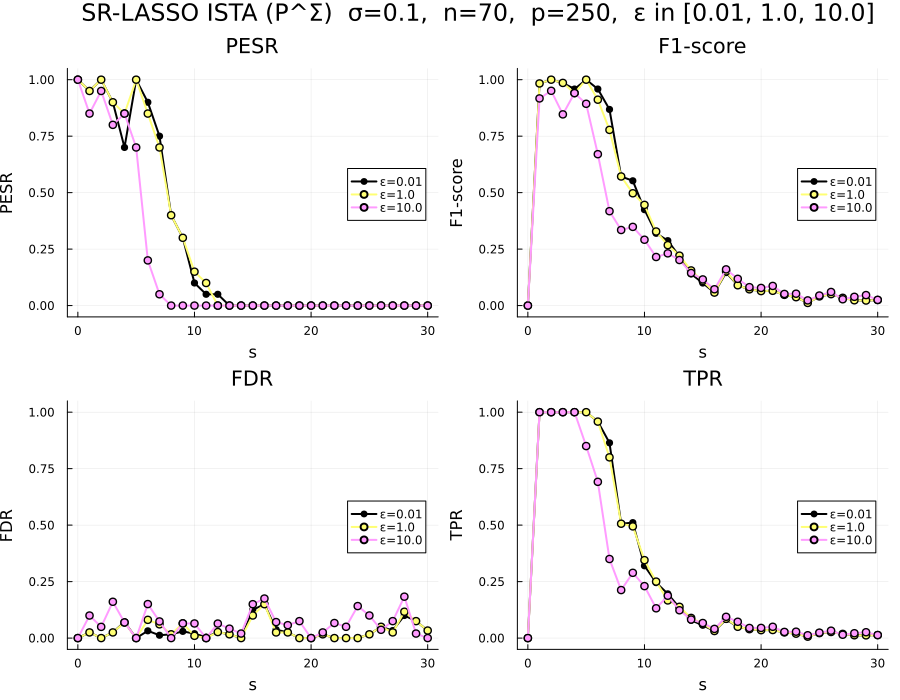

In [ ]:
palette = distinguishable_colors(length(epsilons))

plt_pesr = plot(title = "PESR", xlabel="s", ylabel="PESR",
                ylim=(-0.05,1.05), legend=:right)
plt_f1   = plot(title = "F1-score", xlabel="s", ylabel="F1-score",
                ylim=(-0.05,1.05), legend=:right)
plt_fdr  = plot(title = "FDR", xlabel="s", ylabel="FDR",
                ylim=(-0.05,1.05), legend=:right)
plt_tpr  = plot(title = "TPR", xlabel="s", ylabel="TPR",
                ylim=(-0.05,1.05), legend=:right)

for (i, eps) in enumerate(epsilons)
    r = results[eps]
    plot!(plt_pesr, r.s, r.pesr; lw=2, marker=:circle, color=palette[i], label="ε=$(eps)")
    plot!(plt_f1,   r.s, r.f1;   lw=2, marker=:circle, color=palette[i], label="ε=$(eps)")
    plot!(plt_fdr,  r.s, r.fdr;  lw=2, marker=:circle, color=palette[i], label="ε=$(eps)")
    plot!(plt_tpr,  r.s, r.tpr;  lw=2, marker=:circle, color=palette[i], label="ε=$(eps)")
end

main_title = "SR-LASSO ISTA (P^Σ)  σ=$sigma,  n=$n,  p=$p,  ε in $(epsilons)"
plot(plt_pesr, plt_f1, plt_fdr, plt_tpr;layout = (2,2), size=(900,700), plot_title = main_title)

In [28]:
savefig(main_title*".png")

"c:\\Users\\Le R\\Desktop\\Code\\Projets\\Geneve\\STAGE-GENEVE\\RAPHAEL\\notebook_explain\\SR-LASSO ISTA (P^Σ)  σ=0.1,  n=70,  p=250,  ε in [0.01, 1.0, 10.0].png"